In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler




In [2]:
coches=pd.read_csv(r"C:\Users\saray\OneDrive\Escritorio\entregable\bmw_pricing_v3.csv")

EXPLORACION DE DATOS

In [3]:
coches.shape

(4843, 18)

In [4]:
coches.head()

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,NaN,118,140411.0,100.0,2012-02-01,diesel,black,NaN,True,True,False,NaN,True,NaN,True,NaN,11300.0,2018-01-01
1,BMW,M4,13929.0,317.0,NaN,petrol,grey,convertible,True,True,False,NaN,False,True,True,True,69700.0,2018-02-01
2,BMW,320,183297.0,120.0,2012-04-01,diesel,white,NaN,False,False,False,NaN,True,False,True,False,10200.0,2018-02-01
3,BMW,420,128035.0,135.0,NaN,diesel,red,convertible,True,True,False,NaN,True,True,True,NaN,25100.0,2018-02-01
4,BMW,425,97097.0,160.0,NaN,diesel,silver,NaN,True,True,False,False,False,True,True,True,33400.0,2018-04-01


In [5]:
coches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   marca                        3873 non-null   object 
 1   modelo                       4840 non-null   object 
 2   km                           4841 non-null   float64
 3   potencia                     4842 non-null   float64
 4   fecha_registro               2420 non-null   object 
 5   tipo_gasolina                4838 non-null   object 
 6   color                        4398 non-null   object 
 7   tipo_coche                   3383 non-null   object 
 8   volante_regulable            4839 non-null   object 
 9   aire_acondicionado           4357 non-null   object 
 10  camara_trasera               4841 non-null   object 
 11  asientos_traseros_plegables  1452 non-null   object 
 12  elevalunas_electrico         4841 non-null   object 
 13  bluetooth         

Verificacion de frilas repetidas

In [6]:
coches[coches.duplicated(keep=False)]

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta


In [7]:
coches.reset_index(drop=True,inplace=True)

2. Manejo de nulos

In [8]:
coches.isnull().sum()

marca                           970
modelo                            3
km                                2
potencia                          1
fecha_registro                 2423
tipo_gasolina                     5
color                           445
tipo_coche                     1460
volante_regulable                 4
aire_acondicionado              486
camara_trasera                    2
asientos_traseros_plegables    3391
elevalunas_electrico              2
bluetooth                       728
gps                               0
alerta_lim_velocidad            728
precio                            6
fecha_venta                       1
dtype: int64

Verificacion del porcentaje de nulos

In [9]:
for i in coches:
    print("El % de nulos por cada columna", {i}, "es", {coches[i].isnull().sum() / len(coches[i])})

El % de nulos por cada columna {'marca'} es {np.float64(0.20028907701837703)}
El % de nulos por cada columna {'modelo'} es {np.float64(0.0006194507536650836)}
El % de nulos por cada columna {'km'} es {np.float64(0.00041296716911005574)}
El % de nulos por cada columna {'potencia'} es {np.float64(0.00020648358455502787)}
El % de nulos por cada columna {'fecha_registro'} es {np.float64(0.5003097253768325)}
El % de nulos por cada columna {'tipo_gasolina'} es {np.float64(0.0010324179227751394)}
El % de nulos por cada columna {'color'} es {np.float64(0.09188519512698741)}
El % de nulos por cada columna {'tipo_coche'} es {np.float64(0.3014660334503407)}
El % de nulos por cada columna {'volante_regulable'} es {np.float64(0.0008259343382201115)}
El % de nulos por cada columna {'aire_acondicionado'} es {np.float64(0.10035102209374355)}
El % de nulos por cada columna {'camara_trasera'} es {np.float64(0.00041296716911005574)}
El % de nulos por cada columna {'asientos_traseros_plegables'} es {np.fl

Tratamiento de nulos

In [10]:
coches2=coches.copy()

In [11]:
coches2.drop("marca", axis=1, inplace=True) #eliminamos la columna de marca, datos repetidos

In [12]:
coches2.drop("asientos_traseros_plegables", axis=1, inplace=True)#eliminamos la columna, presenta un 70% de nulos

In [13]:
coches2.drop("fecha_registro",axis=1,inplace=True)#elimino esta columna por tener mas del 50% de los nulos

In [14]:
coches2.dropna(subset=["modelo"],how="all",axis="index", inplace=True)   #<0,6%tiene un bajo porcentaje de nulo, elimino las filas

In [15]:
coches2.dropna(subset=["km"],how="all",axis="index", inplace=True),#<0,04% porcentaje bajo de nulos, elimino filas

(None,)

In [16]:
coches2.dropna(subset=["potencia"],how="all",axis="index", inplace=True) #0,02%, porcentaje bajo de nulos, elimino filas

In [17]:
coches2['fecha_venta'] = pd.to_datetime(coches2['fecha_venta'], errors='coerce')#convierto al formato
coches2 = coches2.dropna(subset=['fecha_venta'])#limpio, solo tiene un nulo

In [18]:
coches2.head()

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,118,140411.0,100.0,diesel,black,NaN,True,True,False,True,NaN,True,NaN,11300.0,2018-01-01
1,M4,13929.0,317.0,petrol,grey,convertible,True,True,False,False,True,True,True,69700.0,2018-02-01
2,320,183297.0,120.0,diesel,white,NaN,False,False,False,True,False,True,False,10200.0,2018-02-01
3,420,128035.0,135.0,diesel,red,convertible,True,True,False,True,True,True,NaN,25100.0,2018-02-01
4,425,97097.0,160.0,diesel,silver,NaN,True,True,False,False,True,True,True,33400.0,2018-04-01


In [19]:
coches2.dropna(subset=["tipo_gasolina"],how="all",axis="index", inplace=True)#<0.10%  porcentaje bajo de nulos, elimino filas

In [20]:
coches2["color"].fillna("Desconocido",inplace=True)# <10% decido imputarlo con valor desconocido para evitar el sesgo significativo

C:\Users\saray\AppData\Local\Temp\ipykernel_10492\1344131164.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  coches2["color"].fillna("Desconocido",inplace=True)# <10% decido imputarlo con valor desconocido para evitar el sesgo significativo


In [21]:
coches2.fillna({"tipo_coche": "Desconocido"}, inplace=True)# desconocido porque me parece relevante la informacion. evito la moda para no contaminar el moedelo>30% 

In [22]:
coches2.dropna(subset=["volante_regulable"],how="all",axis="index", inplace=True)#<0.08%  porcentaje bajo de nulos, elimino filas

In [23]:
coches2.fillna({"aire_acondicionado": "Desconocido"}, inplace=True) # desconocido,  porque tiene un valor de nulos entre el 10% y 30%

In [24]:
coches2.dropna(subset=["camara_trasera"],how="all",axis="index", inplace=True)#<1 en este caso elimino las filas

In [25]:
coches2.dropna(subset=["elevalunas_electrico"],how="all",axis="index", inplace=True)#<1% eliminarfilas

In [26]:
coches2["bluetooth"] = coches2["bluetooth"].astype(bool)#como es una variable de tipo objeto la he covertido a booleano para 
coches2["bluetooth"] = coches2["bluetooth"].replace({"Yes": True, "No": False})#poder imputarlo de esta manera

In [27]:
coches2.fillna({"alerta_lim_velocidad": "Desconocido"}, inplace=True) # desconocido,  porque tiene un valor de nulos entre el 10% y 30%

In [28]:
coches2.dropna(subset=["elevalunas_electrico"],how="all",axis="index", inplace=True)#<1% eliminarfilas

In [29]:
coches2.dropna(subset=["precio"],how="all",axis="index", inplace=True)

In [30]:
coches.reset_index(drop=True,inplace=True)

Dataframe sin nulos

In [31]:
coches2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4817 entries, 0 to 4842
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   modelo                4817 non-null   object        
 1   km                    4817 non-null   float64       
 2   potencia              4817 non-null   float64       
 3   tipo_gasolina         4817 non-null   object        
 4   color                 4817 non-null   object        
 5   tipo_coche            4817 non-null   object        
 6   volante_regulable     4817 non-null   object        
 7   aire_acondicionado    4817 non-null   object        
 8   camara_trasera        4817 non-null   object        
 9   elevalunas_electrico  4817 non-null   object        
 10  bluetooth             4817 non-null   bool          
 11  gps                   4817 non-null   bool          
 12  alerta_lim_velocidad  4817 non-null   object        
 13  precio                4

3. Analisis univariables variables

Conversion de variables float a int

In [32]:
# he leido que para Machine Learning (ML), los "int" son ideales para usarlos cuando:
# queremos representar categorias, es decir para realziar codificaciones numericas.
columnas_float_convertidas=["precio","km","potencia"]
for col in columnas_float_convertidas:
    coches2[col]= coches2[col].astype(int)
print (coches2)

                 modelo      km  potencia tipo_gasolina   color   tipo_coche  \
0                   118  140411       100        diesel   black  Desconocido   
1                    M4   13929       317        petrol    grey  convertible   
2                   320  183297       120        diesel   white  Desconocido   
3                   420  128035       135        diesel     red  convertible   
4                   425   97097       160        diesel  silver  Desconocido   
...                 ...     ...       ...           ...     ...          ...   
4838    218 Gran Tourer   39743       110        diesel   black  Desconocido   
4839  218 Active Tourer   49832       100        diesel    grey  Desconocido   
4840    218 Gran Tourer   19633       110        diesel    grey          van   
4841  218 Active Tourer   27920       110        diesel   brown          van   
4842                525  195840       160        diesel    grey  Desconocido   

     volante_regulable aire_acondiciona

Conversion de variables de objetos bool

In [33]:
columnas_object1_convertidas= ['volante_regulable', 'aire_acondicionado', 'camara_trasera', 'elevalunas_electrico',
       'alerta_lim_velocidad']
for  col in columnas_object1_convertidas:
        coches2[col]= coches2[col].astype(bool)
print(coches2)

                 modelo      km  potencia tipo_gasolina   color   tipo_coche  \
0                   118  140411       100        diesel   black  Desconocido   
1                    M4   13929       317        petrol    grey  convertible   
2                   320  183297       120        diesel   white  Desconocido   
3                   420  128035       135        diesel     red  convertible   
4                   425   97097       160        diesel  silver  Desconocido   
...                 ...     ...       ...           ...     ...          ...   
4838    218 Gran Tourer   39743       110        diesel   black  Desconocido   
4839  218 Active Tourer   49832       100        diesel    grey  Desconocido   
4840    218 Gran Tourer   19633       110        diesel    grey          van   
4841  218 Active Tourer   27920       110        diesel   brown          van   
4842                525  195840       160        diesel    grey  Desconocido   

      volante_regulable  aire_acondicio

In [34]:
#Al covertir directamente estas variables de objetos en booleanas, me di cuenta que las celdas vacias aparecian NAN
#Como he visto que estas variables son valores binarios, tuve que hacer un mapeado.
#al avanzar en mi limpieza de datos reconozco que he hecho cosas redundante. estoy modo ensayo error.

#columnas_object1_convertidas= ['volante_regulable', 'aire_acondicionado', 'camara_trasera', 'elevalunas_electrico',
      # 'alerta_lim_velocidad']
#for col in columnas_object1_convertidas:
  #  coches2[col] = coches2[col].map({'Sí': True, 'No': False}).fillna(False)

#no se si este era el paso correcto, hacer lo otro. Me volvi un lio! asi que decidi dejarlo asi

In [35]:
coches2.head()

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,118,140411,100,diesel,black,Desconocido,True,True,False,True,True,True,True,11300,2018-01-01
1,M4,13929,317,petrol,grey,convertible,True,True,False,False,True,True,True,69700,2018-02-01
2,320,183297,120,diesel,white,Desconocido,False,False,False,True,False,True,False,10200,2018-02-01
3,420,128035,135,diesel,red,convertible,True,True,False,True,True,True,True,25100,2018-02-01
4,425,97097,160,diesel,silver,Desconocido,True,True,False,False,True,True,True,33400,2018-04-01


Tratamiento de categoricas: "modelo","color","tipo_coche","tipo_gasolina

In [36]:
coches3=coches2.copy()

In [37]:
#quiero ordenar mi data set
orden=["precio","modelo","tipo_coche","color", "potencia","km", "fecha_venta","tipo_gasolina", "volante_regulable", "aire_acondicionado","camara_trasera","elevalunas_electrico","bluetooth", "gps","alerta_lim_velocidad"]
coches3=coches2[orden]

In [38]:
coches3.head()

,precio,modelo,tipo_coche,color,potencia,km,fecha_venta,tipo_gasolina,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad
0,11300,118,Desconocido,black,100,140411,2018-01-01,diesel,True,True,False,True,True,True,True
1,69700,M4,convertible,grey,317,13929,2018-02-01,petrol,True,True,False,False,True,True,True
2,10200,320,Desconocido,white,120,183297,2018-02-01,diesel,False,False,False,True,False,True,False
3,25100,420,convertible,red,135,128035,2018-02-01,diesel,True,True,False,True,True,True,True
4,33400,425,Desconocido,silver,160,97097,2018-04-01,diesel,True,True,False,False,True,True,True


Clasificacion variable 'modelo' segun la demanda del mercado

In [39]:
m_alta_demanda = ['320', '520', '318', 'X3', '116', 'X1', '316', 'X5', '525', '530']
m_media_demanda = ['118', '318 Gran Turismo', '320 Gran Turismo', '518', '535', 'X4', 
    'X6', '420', '120', '330', '420 Gran Coupé', '730']
m_baja_demanda = [ '520 Gran Turismo', '640 Gran Coupé', '325', '530 Gran Turismo', 
    '740', 'X5 M', '114', '218 Active Tourer', 'M550', '218', 
    '218 Gran Tourer', '640', '418 Gran Coupé', 'X6 M', '335', 'M3', 
    '528', '435 Gran Coupé', 'i3', 'Z4', '125', '328', '325 Gran Turismo', 
    '216 Gran Tourer', '430 Gran Coupé', '523', '135', '435', '225 Active Tourer',
    '330 Gran Turismo', '220', '216 Active Tourer', 'M235', '335 Gran Turismo', 
    'X5 M50', '650', '425', 'M4', '430', '535 Gran Turismo', '123', 
    '750', '635', '225', 'i8', '630', 'M135', 'M5', '735', 'ActiveHybrid 5', 
    '216', '220 Active Tourer','225 Active Tourer ', '214 Gran Tourer',' Active Tourer']

In [40]:
coches3["modelo"] = np.where(coches3["modelo"].isin(m_alta_demanda), "m_alta_demanda", coches3["modelo"])
coches3["modelo"] = np.where(coches3["modelo"].isin(m_media_demanda), "m_media_demanda", coches3["modelo"])
coches3["modelo"] = np.where(coches3["modelo"].isin(m_baja_demanda), "m_baja_demanda", coches3["modelo"])

In [41]:
coches3["modelo"].value_counts().reset_index()

,modelo,count
0,m_alta_demanda,3811
1,m_media_demanda,691
2,m_baja_demanda,315


Clasificacion variable color por gama

In [42]:
calidos = ['red', 'orange']
frios = ['blue', 'green']
neutros = ['black', 'grey', 'brown', 'white', 'silver', 'beige']
desconocidos=["Desconocido"]

In [43]:
coches3["color"] = np.where(coches3["color"].isin(calidos), "calidos", coches3["color"])
coches3["color"] = np.where(coches3["color"].isin(frios), "frios", coches3["color"])
coches3["color"] = np.where(coches3["color"].isin(neutros), "neutros", coches3["color"])
coches3["color"] = np.where(coches3["color"].isin(desconocidos),"Desconocido", coches3["color"])

In [44]:
coches3["color"].value_counts().reset_index()

,color,count
0,neutros,3665
1,frios,657
2,Desconocido,442
3,calidos,53


Clasificacion variable tipo_coche segun la demanda del mercado

In [45]:
t_alta_demanda=["estate", "sedan", "coupe"]
t_media_demanda=["suv", "hatchback", "van"]
t_baja_demanda=["subcompact", "convertible"]
desconocido=["Desconocido"]

In [46]:
coches3["tipo_coche"] = np.where(coches3["tipo_coche"].isin(t_alta_demanda), "t_alta_demanda", coches3["tipo_coche"])
coches3["tipo_coche"] = np.where(coches3["tipo_coche"].isin(t_media_demanda), "t_media_demanda", coches3["tipo_coche"])
coches3["tipo_coche"] = np.where(coches3["tipo_coche"].isin(t_baja_demanda), "t_baja_demanda", coches3["tipo_coche"])
coches3["tipo_coche"] = np.where(coches3["tipo_coche"].isin([desconocido]), "Desconocido", coches3["tipo_coche"])

In [47]:
coches3["tipo_coche"].value_counts().reset_index()

,tipo_coche,count
0,t_alta_demanda,1991
1,Desconocido,1449
2,t_media_demanda,1270
3,t_baja_demanda,107


Con la columna de gasolina, filtro el data frame definiendo un umbral hasta 10 

In [48]:
umbral = 10 #quiero clasificar usando esta funcion definiendo un umbral. 
frequencies = coches3['tipo_gasolina'].value_counts()
valid_categories = frequencies[frequencies >= umbral].index
coches3 = coches3[coches3['tipo_gasolina'].isin(valid_categories)]
#elimino las que se encuentran fuera del umbral, tipo gasolina no lo considero imporatnte para el modelo

In [49]:
coches3["tipo_gasolina"].value_counts().reset_index()

,tipo_gasolina,count
0,diesel,4610
1,petrol,191


<Axes: xlabel='volante_regulable'>

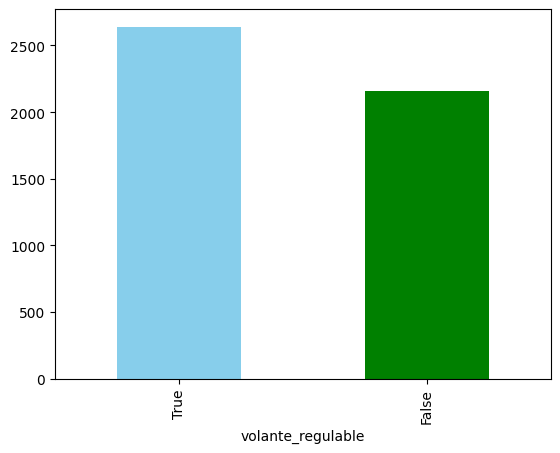

In [50]:
coches3["volante_regulable"].value_counts().plot(kind="bar",color=['skyblue', 'green'])


<Axes: xlabel='gps'>

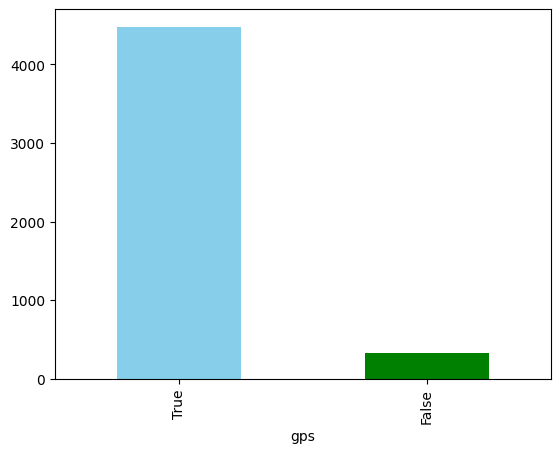

In [51]:
coches3["gps"].value_counts().plot(kind="bar",color=['skyblue', 'green'])

<Axes: xlabel='camara_trasera'>

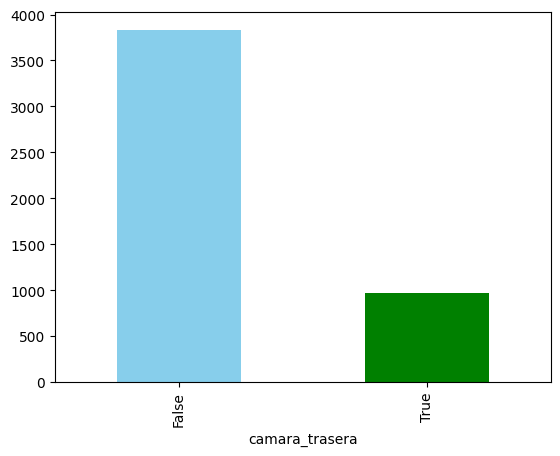

In [52]:
coches3["camara_trasera"].value_counts().plot(kind="bar",color=['skyblue', 'green'])

<Axes: xlabel='alerta_lim_velocidad'>

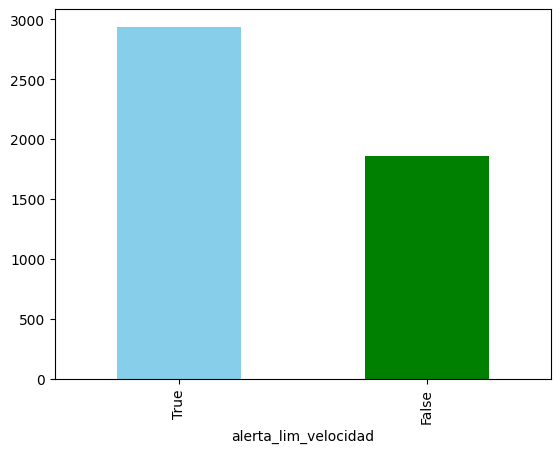

In [53]:
coches3["alerta_lim_velocidad"].value_counts().plot(kind="bar",color=['skyblue', 'green'])

4. Análisis de correlación inicial, ¿Hay alguna variable correlacionada?

In [54]:
corr = coches3.corr(numeric_only=True)
corr = coches3.corr(numeric_only=True)
corr.style.background_gradient(cmap='Blues',axis=None)

,precio,potencia,km,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad
precio,1.000000,0.644943,-0.408415,0.267639,0.225964,0.256343,0.266247,0.176841,-0.002716,0.386725
potencia,0.644943,1.000000,-0.050008,0.326058,0.184392,0.316169,0.341690,0.190933,0.009097,0.427034
km,-0.408415,-0.050008,1.000000,0.067425,0.014906,0.001605,0.046052,-0.012015,0.154549,-0.037869
volante_regulable,0.267639,0.326058,0.067425,1.000000,0.288116,0.254114,0.278191,0.108829,0.244057,0.188012
aire_acondicionado,0.225964,0.184392,0.014906,0.288116,1.000000,0.143843,0.258371,0.100811,0.343193,0.172602
camara_trasera,0.256343,0.316169,0.001605,0.254114,0.143843,1.000000,0.198936,0.126469,0.060690,0.167928
elevalunas_electrico,0.266247,0.341690,0.046052,0.278191,0.258371,0.198936,1.000000,0.204300,0.202019,0.300433
bluetooth,0.176841,0.190933,-0.012015,0.108829,0.100811,0.126469,0.204300,1.000000,0.104521,0.087300
gps,-0.002716,0.009097,0.154549,0.244057,0.343193,0.060690,0.202019,0.104521,1.000000,-0.054057
alerta_lim_velocidad,0.386725,0.427034,-0.037869,0.188012,0.172602,0.167928,0.300433,0.087300,-0.054057,1.000000


5. Análisis variable vs target, ¿Hay algún insight interesante?

In [55]:
target= ["precio","log_precio"]

array([[<Axes: title={'center': 'precio'}>]], dtype=object)

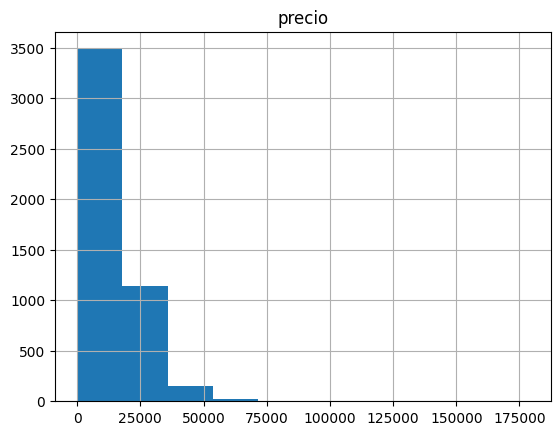

In [56]:
coches3.hist("precio")

array([[<Axes: title={'center': 'log_precio'}>]], dtype=object)

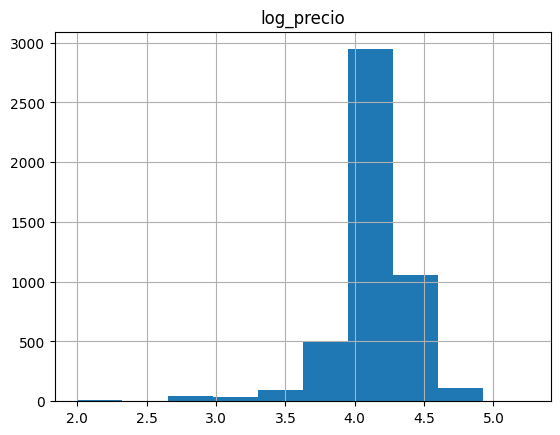

In [57]:
coches3["log_precio"]=np.log10(coches3["precio"])
coches3.hist("log_precio")

<Axes: xlabel='log_precio'>

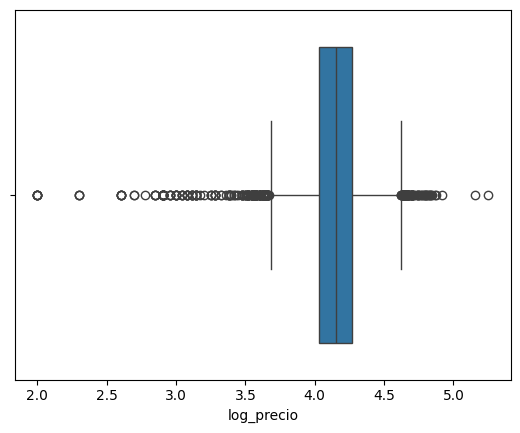

In [58]:
sns.boxplot(x=coches3["log_precio"])

In [59]:
coches3["log_precio"].describe()

count    4801.000000
mean        4.128943
std         0.279563
min         2.000000
25%         4.033424
50%         4.152288
75%         4.269513
max         5.251638
Name: log_precio, dtype: float64

In [60]:
coches3["color"].describe()

count        4801
unique          4
top       neutros
freq         3651
Name: color, dtype: object

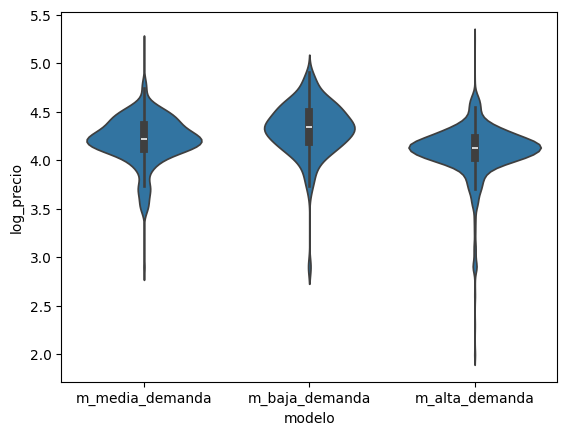

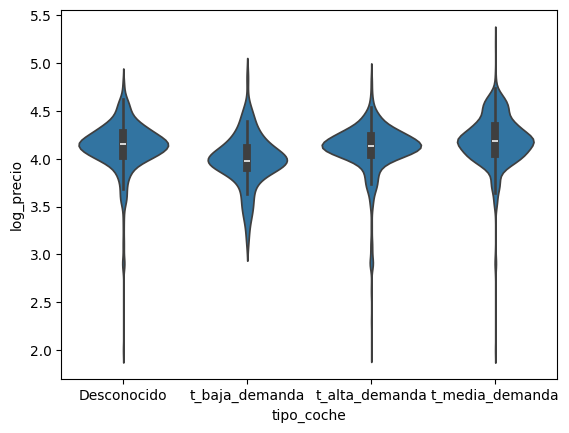

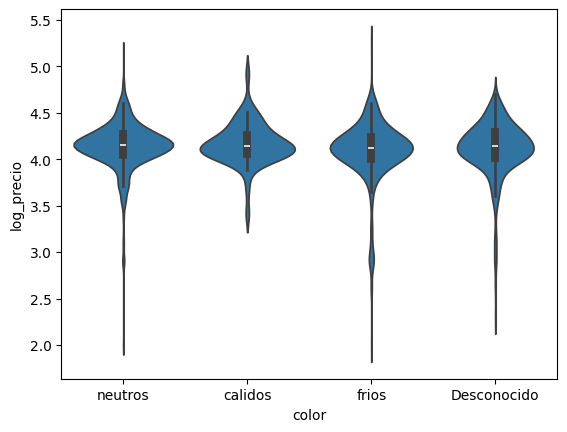

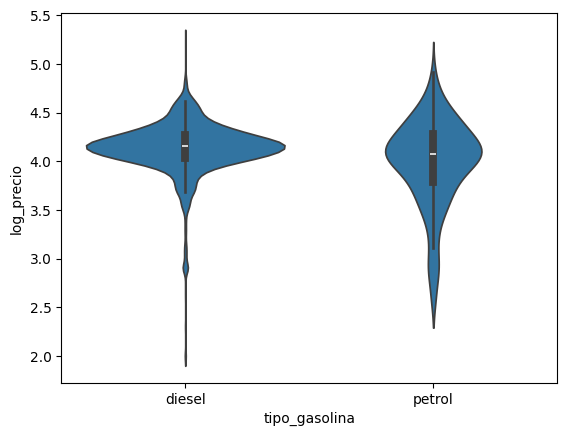

In [61]:
for i in coches3:
  if (coches3[i].dtype.kind =="O"):
    plt.figure()
    sns.violinplot(x=i,y="log_precio", data=coches3) 

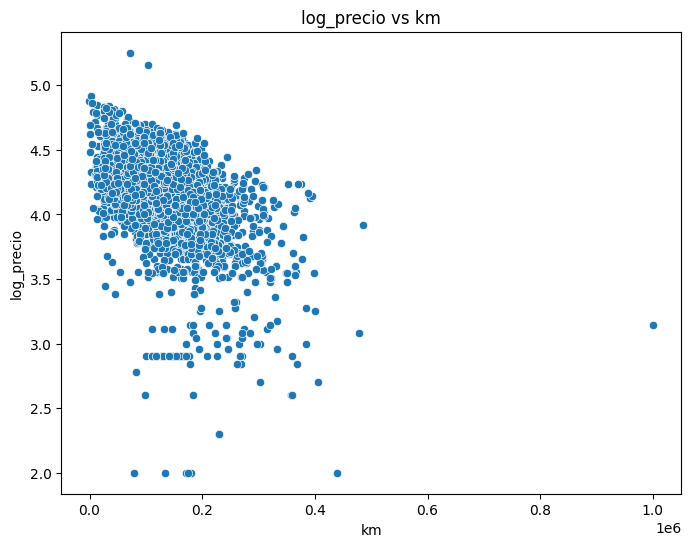

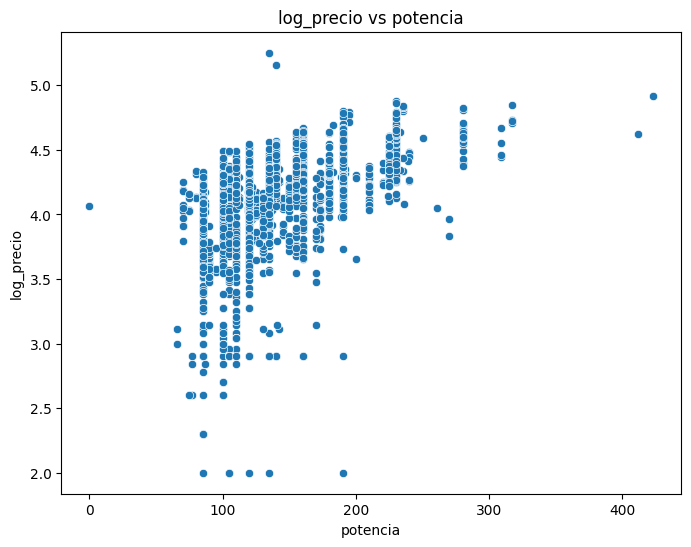

In [62]:
var_numericas= ['km', 'potencia']
for var in var_numericas:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=coches3[var], y=coches3['log_precio'])
    plt.title(f'log_precio vs {var}')
    plt.xlabel(var)
    plt.ylabel('log_precio')
    plt.show()

6.Transformación de categóricas a numéricas, ¿Qué variables van a transformar? ¿Que técnica se va usar?

In [63]:
coches3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4801 entries, 0 to 4842
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   precio                4801 non-null   int64         
 1   modelo                4801 non-null   object        
 2   tipo_coche            4801 non-null   object        
 3   color                 4801 non-null   object        
 4   potencia              4801 non-null   int64         
 5   km                    4801 non-null   int64         
 6   fecha_venta           4801 non-null   datetime64[ns]
 7   tipo_gasolina         4801 non-null   object        
 8   volante_regulable     4801 non-null   bool          
 9   aire_acondicionado    4801 non-null   bool          
 10  camara_trasera        4801 non-null   bool          
 11  elevalunas_electrico  4801 non-null   bool          
 12  bluetooth             4801 non-null   bool          
 13  gps                   4

In [64]:
target=['precio','precio_log']

In [65]:
def obtener_lista_variables(dataset):
    lista_numericas=[]
    lista_boolean=[]

    for i in dataset:
        if    (dataset[i].dtype.kind in ("f","i")) and len(dataset[i].unique())!= 2  and i not in target:
              lista_numericas.append(i)
        elif  (dataset[i].dtype.kind in ("f","i")) and len(dataset[i].unique())== 2  and i not in target:
              lista_boolean.append(i)
        elif (dataset[i].dtype == "bool") and i not in target:  # Verificar columnas de tipo bool
            lista_boolean.append(i)
                
    return lista_numericas, lista_boolean

In [66]:
lista_numericas, lista_boolean,= obtener_lista_variables(coches3)

In [67]:
lista_boolean

['volante_regulable',
 'aire_acondicionado',
 'camara_trasera',
 'elevalunas_electrico',
 'bluetooth',
 'gps',
 'alerta_lim_velocidad']

In [68]:
lista_numericas

['potencia', 'km', 'log_precio']

Quiero tratar de la variable color y tipo_coche "Desconocido" como una categoría separada en One-Hot Encoding

In [69]:
coches3 = pd.get_dummies(coches3, columns=["tipo_coche"], drop_first=False)

In [70]:
coches3 = pd.get_dummies(coches3, columns=["color"], drop_first=False)

Conversion de modelo y tipo_gasolina

In [71]:
coches3 = pd.get_dummies(coches3, columns=["modelo"], drop_first=False)

In [72]:
coches3 = pd.get_dummies(coches3, columns=["tipo_gasolina"], drop_first=False)

In [73]:
pd.set_option('display.max_columns', None)#uso esta API para ajustar los datos

tratamiento de fechas

In [74]:
for col in ['fecha_venta']:
    coches3[col + '_mes'] = coches3[col].dt.month
    coches3[col + '_año'] = coches3[col].dt.year

In [75]:
pd.set_option('display.max_columns', None)

In [76]:
coches3.head()

,precio,potencia,km,fecha_venta,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,log_precio,tipo_coche_Desconocido,tipo_coche_t_alta_demanda,tipo_coche_t_baja_demanda,tipo_coche_t_media_demanda,color_Desconocido,color_calidos,color_frios,color_neutros,modelo_m_alta_demanda,modelo_m_baja_demanda,modelo_m_media_demanda,tipo_gasolina_diesel,tipo_gasolina_petrol,fecha_venta_mes,fecha_venta_año
0,11300,100,140411,2018-01-01,True,True,False,True,True,True,True,4.053078,True,False,False,False,False,False,False,True,False,False,True,True,False,1,2018
1,69700,317,13929,2018-02-01,True,True,False,False,True,True,True,4.843233,False,False,True,False,False,False,False,True,False,True,False,False,True,2,2018
2,10200,120,183297,2018-02-01,False,False,False,True,False,True,False,4.008600,True,False,False,False,False,False,False,True,True,False,False,True,False,2,2018
3,25100,135,128035,2018-02-01,True,True,False,True,True,True,True,4.399674,False,False,True,False,False,True,False,False,False,False,True,True,False,2,2018
4,33400,160,97097,2018-04-01,True,True,False,False,True,True,True,4.523746,True,False,False,False,False,False,False,True,False,True,False,True,False,4,2018


In [77]:
pd.reset_option("max_columns")

7. Escalar variables (usando minmaxscaler) y luego aplicar la correlación final de variables ¿Hay alguna variable finalmente correlacionada?

In [78]:
coches4=coches3.copy()

In [79]:

def minmaxTransformacion(variable_transformar):
    minMaxresultado=MinMaxScaler()
    coches4[variable_transformar]=minMaxresultado.fit_transform(coches4[variable_transformar].values.reshape(-1,1))
    return minMaxresultado

In [80]:
for i in lista_numericas:
  print(i)

potencia
km
log_precio


In [81]:
corr = coches4.corr(numeric_only=True)
corr = coches4.corr(numeric_only=True)
corr.style.background_gradient(cmap='Blues',axis=None)

,precio,potencia,km,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,log_precio,tipo_coche_Desconocido,tipo_coche_t_alta_demanda,tipo_coche_t_baja_demanda,tipo_coche_t_media_demanda,color_Desconocido,color_calidos,color_frios,color_neutros,modelo_m_alta_demanda,modelo_m_baja_demanda,modelo_m_media_demanda,tipo_gasolina_diesel,tipo_gasolina_petrol,fecha_venta_mes,fecha_venta_año
precio,1.000000,0.644943,-0.408415,0.267639,0.225964,0.256343,0.266247,0.176841,-0.002716,0.386725,0.809631,-0.015847,-0.110478,-0.067619,0.162657,-0.011272,0.012606,-0.034354,0.032179,-0.271782,0.262719,0.131038,0.031327,-0.031327,0.014316,0.014017
potencia,0.644943,1.000000,-0.050008,0.326058,0.184392,0.316169,0.341690,0.190933,0.009097,0.427034,0.509265,-0.010007,0.011554,-0.103279,0.032110,-0.007389,-0.004677,-0.015544,0.018651,-0.273527,0.335866,0.082043,-0.121327,0.121327,-0.029282,-0.001737
km,-0.408415,-0.050008,1.000000,0.067425,0.014906,0.001605,0.046052,-0.012015,0.154549,-0.037869,-0.436026,0.002889,0.148262,-0.044004,-0.154002,0.010107,-0.034633,-0.014028,0.012914,0.140911,-0.130918,-0.071631,0.037322,-0.037322,-0.000199,-0.032462
volante_regulable,0.267639,0.326058,0.067425,1.000000,0.288116,0.254114,0.278191,0.108829,0.244057,0.188012,0.249011,-0.023131,0.054468,-0.053493,-0.018884,-0.026272,-0.028670,0.011818,0.015311,-0.064569,0.082352,0.017229,0.010856,-0.010856,0.079919,-0.000146
aire_acondicionado,0.225964,0.184392,0.014906,0.288116,1.000000,0.143843,0.258371,0.100811,0.343193,0.172602,0.306709,-0.023213,0.103525,-0.110173,-0.054645,-0.047421,-0.042311,-0.003536,0.045325,-0.018253,0.027646,0.001826,0.087375,-0.087375,0.006699,-0.013633
camara_trasera,0.256343,0.316169,0.001605,0.254114,0.143843,1.000000,0.198936,0.126469,0.060690,0.167928,0.199920,0.004363,-0.032918,-0.054772,0.050610,-0.032534,-0.028252,0.001415,0.027817,-0.112601,0.116923,0.048657,-0.014582,0.014582,0.020298,0.014412
elevalunas_electrico,0.266247,0.341690,0.046052,0.278191,0.258371,0.198936,1.000000,0.204300,0.202019,0.300433,0.320409,-0.005745,0.067406,-0.082939,-0.041579,-0.012496,-0.017673,-0.039910,0.044889,-0.108831,0.059018,0.084682,-0.006412,0.006412,-0.023502,-0.002259
bluetooth,0.176841,0.190933,-0.012015,0.108829,0.100811,0.126469,0.204300,1.000000,0.104521,0.087300,0.162571,-0.010167,-0.006345,-0.035564,0.029594,-0.019933,0.021422,0.008845,0.001145,-0.096863,0.086750,0.051502,-0.024598,0.024598,-0.012842,0.021311
gps,-0.002716,0.009097,0.154549,0.244057,0.343193,0.060690,0.202019,0.104521,1.000000,-0.054057,0.045407,-0.000996,0.075804,0.023742,-0.091658,-0.014851,-0.011310,0.005330,0.008543,-0.008768,0.005831,0.006072,0.047198,-0.047198,0.061943,-0.007715
alerta_lim_velocidad,0.386725,0.427034,-0.037869,0.188012,0.172602,0.167928,0.300433,0.087300,-0.054057,1.000000,0.367413,-0.006211,0.026271,-0.096942,0.009582,-0.025849,-0.022228,-0.019714,0.038807,-0.091549,0.085833,0.045996,0.010680,-0.010680,-0.032126,-0.007350


In [82]:
pd.reset_option("max_columns")

In [83]:
coches4.head()

,precio,potencia,km,fecha_venta,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,...,color_calidos,color_frios,color_neutros,modelo_m_alta_demanda,modelo_m_baja_demanda,modelo_m_media_demanda,tipo_gasolina_diesel,tipo_gasolina_petrol,fecha_venta_mes,fecha_venta_año
0,11300,100,140411,2018-01-01,True,True,False,True,True,True,...,False,False,True,False,False,True,True,False,1,2018
1,69700,317,13929,2018-02-01,True,True,False,False,True,True,...,False,False,True,False,True,False,False,True,2,2018
2,10200,120,183297,2018-02-01,False,False,False,True,False,True,...,False,False,True,True,False,False,True,False,2,2018
3,25100,135,128035,2018-02-01,True,True,False,True,True,True,...,True,False,False,False,False,True,True,False,2,2018
4,33400,160,97097,2018-04-01,True,True,False,False,True,True,...,False,False,True,False,True,False,True,False,4,2018


In [84]:
corr = coches4.corr(numeric_only=True)#mido la correlacion lineal

In [85]:
corr2=corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))#observo los valores superiores

In [86]:
corr2.stack()#reorganizo mis datos haciendo una transpuesta

precio                potencia              0.644943
                      km                   -0.408415
                      volante_regulable     0.267639
                      aire_acondicionado    0.225964
                      camara_trasera        0.256343
                                              ...   
tipo_gasolina_diesel  fecha_venta_mes       0.013400
                      fecha_venta_año      -0.005837
tipo_gasolina_petrol  fecha_venta_mes      -0.013400
                      fecha_venta_año       0.005837
fecha_venta_mes       fecha_venta_año      -0.009931
Length: 325, dtype: float64

In [87]:
corr3=corr2.unstack().dropna()#elimino los nulos

In [88]:
corr4 = corr3.sort_values()

In [89]:
pd.set_option("display.max_rows",None)

In [90]:
corr4

tipo_gasolina_petrol        tipo_gasolina_diesel         -1.000000
modelo_m_media_demanda      modelo_m_alta_demanda        -0.800246
color_neutros               color_frios                  -0.708212
                            color_Desconocido            -0.567381
tipo_coche_t_alta_demanda   tipo_coche_Desconocido       -0.550645
modelo_m_baja_demanda       modelo_m_alta_demanda        -0.510535
tipo_coche_t_media_demanda  tipo_coche_t_alta_demanda    -0.502173
log_precio                  km                           -0.436026
km                          precio                       -0.408415
tipo_coche_t_media_demanda  tipo_coche_Desconocido       -0.392281
modelo_m_alta_demanda       potencia                     -0.273527
                            precio                       -0.271782
tipo_gasolina_diesel        modelo_m_baja_demanda        -0.238645
modelo_m_alta_demanda       log_precio                   -0.215512
color_neutros               color_calidos                -0.18

In [91]:
pd.reset_option("max_rows")

In [92]:
corr.style.background_gradient(cmap='Blues',axis=None)

,precio,potencia,km,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,log_precio,tipo_coche_Desconocido,tipo_coche_t_alta_demanda,tipo_coche_t_baja_demanda,tipo_coche_t_media_demanda,color_Desconocido,color_calidos,color_frios,color_neutros,modelo_m_alta_demanda,modelo_m_baja_demanda,modelo_m_media_demanda,tipo_gasolina_diesel,tipo_gasolina_petrol,fecha_venta_mes,fecha_venta_año
precio,1.000000,0.644943,-0.408415,0.267639,0.225964,0.256343,0.266247,0.176841,-0.002716,0.386725,0.809631,-0.015847,-0.110478,-0.067619,0.162657,-0.011272,0.012606,-0.034354,0.032179,-0.271782,0.262719,0.131038,0.031327,-0.031327,0.014316,0.014017
potencia,0.644943,1.000000,-0.050008,0.326058,0.184392,0.316169,0.341690,0.190933,0.009097,0.427034,0.509265,-0.010007,0.011554,-0.103279,0.032110,-0.007389,-0.004677,-0.015544,0.018651,-0.273527,0.335866,0.082043,-0.121327,0.121327,-0.029282,-0.001737
km,-0.408415,-0.050008,1.000000,0.067425,0.014906,0.001605,0.046052,-0.012015,0.154549,-0.037869,-0.436026,0.002889,0.148262,-0.044004,-0.154002,0.010107,-0.034633,-0.014028,0.012914,0.140911,-0.130918,-0.071631,0.037322,-0.037322,-0.000199,-0.032462
volante_regulable,0.267639,0.326058,0.067425,1.000000,0.288116,0.254114,0.278191,0.108829,0.244057,0.188012,0.249011,-0.023131,0.054468,-0.053493,-0.018884,-0.026272,-0.028670,0.011818,0.015311,-0.064569,0.082352,0.017229,0.010856,-0.010856,0.079919,-0.000146
aire_acondicionado,0.225964,0.184392,0.014906,0.288116,1.000000,0.143843,0.258371,0.100811,0.343193,0.172602,0.306709,-0.023213,0.103525,-0.110173,-0.054645,-0.047421,-0.042311,-0.003536,0.045325,-0.018253,0.027646,0.001826,0.087375,-0.087375,0.006699,-0.013633
camara_trasera,0.256343,0.316169,0.001605,0.254114,0.143843,1.000000,0.198936,0.126469,0.060690,0.167928,0.199920,0.004363,-0.032918,-0.054772,0.050610,-0.032534,-0.028252,0.001415,0.027817,-0.112601,0.116923,0.048657,-0.014582,0.014582,0.020298,0.014412
elevalunas_electrico,0.266247,0.341690,0.046052,0.278191,0.258371,0.198936,1.000000,0.204300,0.202019,0.300433,0.320409,-0.005745,0.067406,-0.082939,-0.041579,-0.012496,-0.017673,-0.039910,0.044889,-0.108831,0.059018,0.084682,-0.006412,0.006412,-0.023502,-0.002259
bluetooth,0.176841,0.190933,-0.012015,0.108829,0.100811,0.126469,0.204300,1.000000,0.104521,0.087300,0.162571,-0.010167,-0.006345,-0.035564,0.029594,-0.019933,0.021422,0.008845,0.001145,-0.096863,0.086750,0.051502,-0.024598,0.024598,-0.012842,0.021311
gps,-0.002716,0.009097,0.154549,0.244057,0.343193,0.060690,0.202019,0.104521,1.000000,-0.054057,0.045407,-0.000996,0.075804,0.023742,-0.091658,-0.014851,-0.011310,0.005330,0.008543,-0.008768,0.005831,0.006072,0.047198,-0.047198,0.061943,-0.007715
alerta_lim_velocidad,0.386725,0.427034,-0.037869,0.188012,0.172602,0.167928,0.300433,0.087300,-0.054057,1.000000,0.367413,-0.006211,0.026271,-0.096942,0.009582,-0.025849,-0.022228,-0.019714,0.038807,-0.091549,0.085833,0.045996,0.010680,-0.010680,-0.032126,-0.007350


In [93]:
del coches4["tipo_gasolina_diesel"] # correlacion inversamente con gasolina_petrol, para no redundar elimino gasolina diesel

In [94]:
del coches4["modelo_m_media_demanda"]#correlcaion inversamente con modelo alta demanda, al tener una corr de -0.800

In [95]:
del coches4["fecha_venta"]
del coches4["fecha_venta_mes"]
del coches4 ["fecha_venta_año"] #pense que al trabajar las fechas me iban aportar alguna informacion, 
#sin embargo observo, que al tener una correlacion muy baja, no tiene sentido seguir tratandola.

In [96]:
coches5=coches4.copy()

In [97]:
corr5 = corr4.sort_values()

In [98]:
pd.set_option("display.max_rows",None)

In [99]:
corr5

tipo_gasolina_petrol        tipo_gasolina_diesel         -1.000000
modelo_m_media_demanda      modelo_m_alta_demanda        -0.800246
color_neutros               color_frios                  -0.708212
                            color_Desconocido            -0.567381
tipo_coche_t_alta_demanda   tipo_coche_Desconocido       -0.550645
modelo_m_baja_demanda       modelo_m_alta_demanda        -0.510535
tipo_coche_t_media_demanda  tipo_coche_t_alta_demanda    -0.502173
log_precio                  km                           -0.436026
km                          precio                       -0.408415
tipo_coche_t_media_demanda  tipo_coche_Desconocido       -0.392281
modelo_m_alta_demanda       potencia                     -0.273527
                            precio                       -0.271782
tipo_gasolina_diesel        modelo_m_baja_demanda        -0.238645
modelo_m_alta_demanda       log_precio                   -0.215512
color_neutros               color_calidos                -0.18

In [100]:
corr.style.background_gradient(cmap='Blues',axis=None)

,precio,potencia,km,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,log_precio,tipo_coche_Desconocido,tipo_coche_t_alta_demanda,tipo_coche_t_baja_demanda,tipo_coche_t_media_demanda,color_Desconocido,color_calidos,color_frios,color_neutros,modelo_m_alta_demanda,modelo_m_baja_demanda,modelo_m_media_demanda,tipo_gasolina_diesel,tipo_gasolina_petrol,fecha_venta_mes,fecha_venta_año
precio,1.000000,0.644943,-0.408415,0.267639,0.225964,0.256343,0.266247,0.176841,-0.002716,0.386725,0.809631,-0.015847,-0.110478,-0.067619,0.162657,-0.011272,0.012606,-0.034354,0.032179,-0.271782,0.262719,0.131038,0.031327,-0.031327,0.014316,0.014017
potencia,0.644943,1.000000,-0.050008,0.326058,0.184392,0.316169,0.341690,0.190933,0.009097,0.427034,0.509265,-0.010007,0.011554,-0.103279,0.032110,-0.007389,-0.004677,-0.015544,0.018651,-0.273527,0.335866,0.082043,-0.121327,0.121327,-0.029282,-0.001737
km,-0.408415,-0.050008,1.000000,0.067425,0.014906,0.001605,0.046052,-0.012015,0.154549,-0.037869,-0.436026,0.002889,0.148262,-0.044004,-0.154002,0.010107,-0.034633,-0.014028,0.012914,0.140911,-0.130918,-0.071631,0.037322,-0.037322,-0.000199,-0.032462
volante_regulable,0.267639,0.326058,0.067425,1.000000,0.288116,0.254114,0.278191,0.108829,0.244057,0.188012,0.249011,-0.023131,0.054468,-0.053493,-0.018884,-0.026272,-0.028670,0.011818,0.015311,-0.064569,0.082352,0.017229,0.010856,-0.010856,0.079919,-0.000146
aire_acondicionado,0.225964,0.184392,0.014906,0.288116,1.000000,0.143843,0.258371,0.100811,0.343193,0.172602,0.306709,-0.023213,0.103525,-0.110173,-0.054645,-0.047421,-0.042311,-0.003536,0.045325,-0.018253,0.027646,0.001826,0.087375,-0.087375,0.006699,-0.013633
camara_trasera,0.256343,0.316169,0.001605,0.254114,0.143843,1.000000,0.198936,0.126469,0.060690,0.167928,0.199920,0.004363,-0.032918,-0.054772,0.050610,-0.032534,-0.028252,0.001415,0.027817,-0.112601,0.116923,0.048657,-0.014582,0.014582,0.020298,0.014412
elevalunas_electrico,0.266247,0.341690,0.046052,0.278191,0.258371,0.198936,1.000000,0.204300,0.202019,0.300433,0.320409,-0.005745,0.067406,-0.082939,-0.041579,-0.012496,-0.017673,-0.039910,0.044889,-0.108831,0.059018,0.084682,-0.006412,0.006412,-0.023502,-0.002259
bluetooth,0.176841,0.190933,-0.012015,0.108829,0.100811,0.126469,0.204300,1.000000,0.104521,0.087300,0.162571,-0.010167,-0.006345,-0.035564,0.029594,-0.019933,0.021422,0.008845,0.001145,-0.096863,0.086750,0.051502,-0.024598,0.024598,-0.012842,0.021311
gps,-0.002716,0.009097,0.154549,0.244057,0.343193,0.060690,0.202019,0.104521,1.000000,-0.054057,0.045407,-0.000996,0.075804,0.023742,-0.091658,-0.014851,-0.011310,0.005330,0.008543,-0.008768,0.005831,0.006072,0.047198,-0.047198,0.061943,-0.007715
alerta_lim_velocidad,0.386725,0.427034,-0.037869,0.188012,0.172602,0.167928,0.300433,0.087300,-0.054057,1.000000,0.367413,-0.006211,0.026271,-0.096942,0.009582,-0.025849,-0.022228,-0.019714,0.038807,-0.091549,0.085833,0.045996,0.010680,-0.010680,-0.032126,-0.007350


In [101]:
corr5 = corr4.sort_values()

In [102]:
pd.set_option("display.max_rows",None)

In [103]:
corr5

tipo_gasolina_petrol        tipo_gasolina_diesel         -1.000000
modelo_m_media_demanda      modelo_m_alta_demanda        -0.800246
color_neutros               color_frios                  -0.708212
                            color_Desconocido            -0.567381
tipo_coche_t_alta_demanda   tipo_coche_Desconocido       -0.550645
modelo_m_baja_demanda       modelo_m_alta_demanda        -0.510535
tipo_coche_t_media_demanda  tipo_coche_t_alta_demanda    -0.502173
log_precio                  km                           -0.436026
km                          precio                       -0.408415
tipo_coche_t_media_demanda  tipo_coche_Desconocido       -0.392281
modelo_m_alta_demanda       potencia                     -0.273527
                            precio                       -0.271782
tipo_gasolina_diesel        modelo_m_baja_demanda        -0.238645
modelo_m_alta_demanda       log_precio                   -0.215512
color_neutros               color_calidos                -0.18

In [104]:
coches6= coches5.copy()

In [105]:
columnas_booleanas= coches6.select_dtypes(include=['bool']).columns  # Detecto mis columnas booleanas
coches6[columnas_booleanas] = coches6[columnas_booleanas].astype(int)  

Normalizo los valores numéricos (Min-Max Scaling)

In [106]:
columnas_numericas= coches6.select_dtypes(include=['int64', 'float64']).columns  
scaler = MinMaxScaler()

Aplico la normalización

In [107]:
columnas_bi = columnas_booleanas # ya estan convertidas
columnas_escalada = [col for col in columnas_numericas if col not in columnas_bi]
coches6[columnas_escalada] = scaler.fit_transform(coches6[columnas_escalada])

In [108]:
df_coches_final=coches6.copy()

In [109]:
df_coches_final.head()

,precio,potencia,km,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,...,tipo_coche_t_alta_demanda,tipo_coche_t_baja_demanda,tipo_coche_t_media_demanda,color_Desconocido,color_calidos,color_frios,color_neutros,modelo_m_alta_demanda,modelo_m_baja_demanda,tipo_gasolina_petrol
0,0.062780,0.236407,0.140413,1,1,0,1,1,1,1,...,0,0,0,0,0,0,1,0,0,0
1,0.390135,0.749409,0.013987,1,1,0,0,1,1,1,...,0,1,0,0,0,0,1,0,1,1
2,0.056614,0.283688,0.183280,0,0,0,1,0,1,0,...,0,0,0,0,0,0,1,1,0,0
3,0.140135,0.319149,0.128043,1,1,0,1,1,1,1,...,0,1,0,0,1,0,0,0,0,0
4,0.186659,0.378251,0.097118,1,1,0,0,1,1,1,...,0,0,0,0,0,0,1,0,1,0


In [110]:
df_coches_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4801 entries, 0 to 4842
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   precio                      4801 non-null   float64
 1   potencia                    4801 non-null   float64
 2   km                          4801 non-null   float64
 3   volante_regulable           4801 non-null   int64  
 4   aire_acondicionado          4801 non-null   int64  
 5   camara_trasera              4801 non-null   int64  
 6   elevalunas_electrico        4801 non-null   int64  
 7   bluetooth                   4801 non-null   int64  
 8   gps                         4801 non-null   int64  
 9   alerta_lim_velocidad        4801 non-null   int64  
 10  log_precio                  4801 non-null   float64
 11  tipo_coche_Desconocido      4801 non-null   int64  
 12  tipo_coche_t_alta_demanda   4801 non-null   int64  
 13  tipo_coche_t_baja_demanda   4801 non-n

In [111]:
dataset_50filas=df_coches_final.head(50)

In [112]:
dataset_50filas.to_excel("dataset_50filas.xlsx", index=False)
print("archivo excel")

archivo excel
